<a href="https://colab.research.google.com/github/tsgomes9/Tecnicas_DataScience-MachineLearning/blob/main/Limpeza_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importação de bibliotecas
import pandas as pd
import seaborn as sn
import statistics as sts 

## **Importação e análise inicial da base de dados**
Dados importados de um arquivo csv contido em uma pasta do google drive. Os dados estão separados por ";", por isso será utilizada a função sep para definição das colunas.

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Bases de dados/Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### **Dimensão da base de dados**
A tabela contém 999 cadastros (linhas) e 12 atributos (colunas)

In [4]:
dataset.shape

(999, 12)

### **Renomeação de atributos**

In [5]:
dataset.columns = ["ID", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito","Ativo","Salario","Saiu"]
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### **Análise da coluna "Estado"**

Agrupamento para verificação de quantidades e ortografia das siglas dos estados

In [6]:
agrup_est = dataset.groupby(['Estado']).size()
agrup_est.head()

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
dtype: int64

Visualização em gráfico de barras das quantidades de registros para cada estado

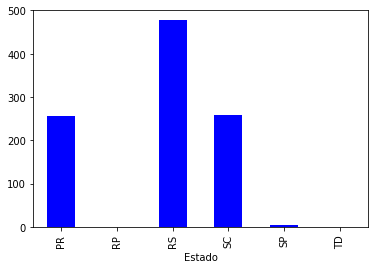

In [7]:
agrup_est.plot.bar(color="blue");

### **Análise da coluna "Genero"**

Agrupamento para verificação de distribuição dos valores da coluna Genero. Será necessário realizar a normalização dos títulos para F e M.

In [8]:
agrup_gen = dataset.groupby(['Genero']).size()
agrup_gen.head()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

### **Análise da coluna "Score"**

Análise estatística dos valores da coluna Score

In [9]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Verificação de outliers para coluna Score. É possível notar que não há valores fora de contexto ou dispersos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


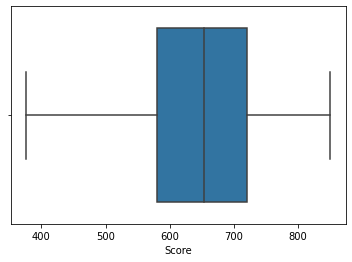

In [10]:
sn.boxplot(dataset['Score']);

Gráfico de distribuição da coluna Score. É possível notar que a distribuição é normalizada, estando a maior parte entre 600 e 750.

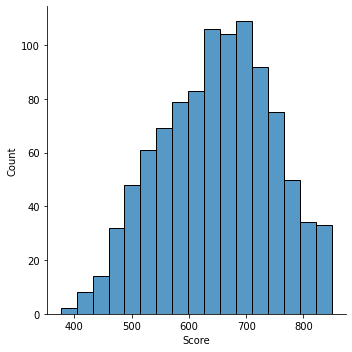

In [11]:
sn.displot(dataset['Score']);

### **Análise da coluna Idade**

Análise estatística da coluna Idade. É possível notar valores fora de contexto que deverão ser substituídos pela mediana.

In [12]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Visualização gráfica dos Outliers da coluna Idade

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

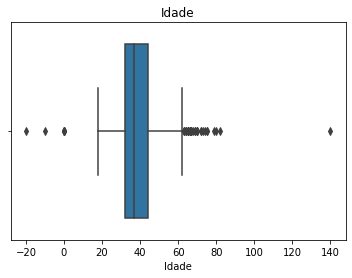

In [13]:
sn.boxplot(dataset['Idade']).set_title('Idade')

Histograma da coluna Idade.

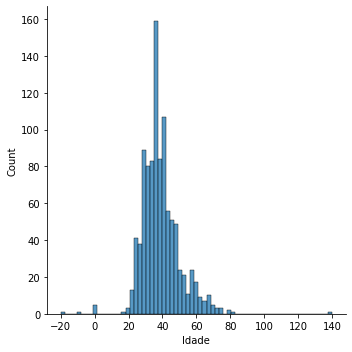

In [14]:
sn.displot(dataset['Idade']);

### **Análise da coluna "Saldo"**

Visualização estatística da coluna Saldo

In [15]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Histograma para verificação da distribuição de valores da coluna Saldo. É possível notar o grande volume de saldos próximos a zero.

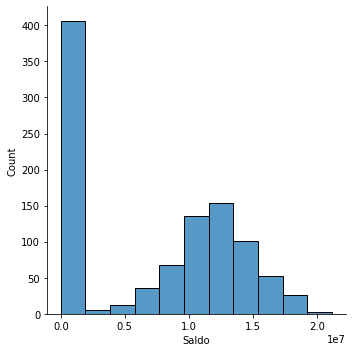

In [16]:
sn.displot(dataset['Saldo']);

### **Análise da coluna "Salario"**

Visualização estatística da coluna Salário.
obs: Os dados de salário desta base são referentes a soma anual

In [17]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Devido à detecção de outliers que podem indicar valores inconsistentes na coluna 'Salario', prejudiciais a análise, será necessário realizar a substituição destes valores pela mediana.

## **Verificação de valores NaN**
Visualização de registros contendo valores não identificados que podem prejudicar a análise dos dados. Foi identificada a presença de registros NaN na coluna salário. Estes deverão ser substituídos pela mediana.

In [19]:
dataset.isnull().sum()

ID                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

## **Tratamento da base de dados**

### **Tratamento da coluna Salario**

Devido a identificação de valores NaN na coluna salário será utilizada a função median para identificar a mediana e seguir com a substituição dos respectivos valores.

In [20]:
salario_mediana = sts.median(dataset['Salario'])
salario_mediana

70518.0

In [21]:
dataset['Salario'].fillna(salario_mediana, inplace=True)
dataset['Salario'].isnull().sum()

0

### **Tratamento da coluna Genero**

Por ser o genero mais recorrente (moda) na base de dados, os valores NaN idenficados da coluna Genero serão substituídas por masculino.

In [22]:
dataset['Genero'].isnull().sum()

8

In [23]:
dataset['Genero'].fillna('Masculino', inplace=True)
dataset['Genero'].isnull().sum()

0

É necessário ainda que os dados da coluna Genero sejam padronizados para "Feminino" e "Masculino"

In [24]:
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'

agrup_genero = dataset.groupby('Genero').size()
agrup_genero

Genero
Feminino     464
Masculino    535
dtype: int64

### **Tratamento da coluna Idade**

Visualização completa de registros com valores outliers na coluna Idade

In [25]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 110)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


Para os registros com valores abaixo de 0 e acima de 110 na coluna Idade, será relizada a substituição destes pela mediana.

In [26]:
idade_mediana = sts.median(dataset['Idade'])
idade_mediana 

37

In [27]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 110), "Idade"] = idade_mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 110)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


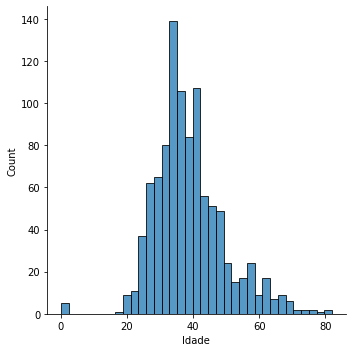

In [28]:
sn.displot(dataset['Idade'])

### **Tratamento da coluna Estado**

Substituição da sigla RP (incorreta) pelo estado mais recorrente (moda) da base de dados (RS).

In [29]:
dataset.loc[dataset['Estado']=='RP', 'Estado'] = "RS"
dataset.loc[dataset['Estado']=='RP'] #Confirmação da substituição

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


### **Remoção de valores duplicados**

In [30]:
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [31]:
dataset.drop_duplicates(subset='ID', keep="first", inplace=True)
dataset.loc[dataset['ID'] == 81]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


## **Visualização da base de dados**
Vizualiação da base após a série de tratamentos realizados.

In [33]:
dataset

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
